# How to plot spatial gene expression estimates created with the splotch DE workflow?



### This script recreates figure 3D in SM-Omics: An automated platform for high-throughput spatial multi-omics; doi: https://doi.org/10.1101/2020.10.14.338418

Load libraries

In [42]:
import os
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import anndata
%matplotlib inline
matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})

In [ ]:
# raw data files needed to run are available at SCP: https://singlecell.broadinstitute.org/single_cell/study/SCP979/
# please download: smomics_anndata_6plex.h5ad

Load definitions

In [97]:
# Load Lambda pmean df
path = '../../smomics_data'

# Read file
filename = os.path.join(path, 'smomics_anndata_6plex.h5ad')
lambda_posterior_means = anndata.read_h5ad(filename)


In [98]:
'Add x,y,image to obs'
lambda_posterior_means.obs['x'] = [int(i.split("_")[2]) for i in lambda_posterior_means.obs.index]
lambda_posterior_means.obs['y'] = [int(i.split("_")[3]) for i in lambda_posterior_means.obs.index]
lambda_posterior_means.obs['image'] = [i.split("_")[0]+"_"+i.split("_")[1] for i in lambda_posterior_means.obs.index]

## Plot a single gene across all different spatial arrays

In [127]:
# Pick a gene:
gene = 'Actb'

assert gene in lambda_posterior_means.var_names, 'Error: %s not found!'%(gene)

# get the names of the image files
count_files = numpy.array(list(lambda_posterior_means.obs['image']))

In [128]:
'For plotting raw counts'
plot_counts = 'norm'

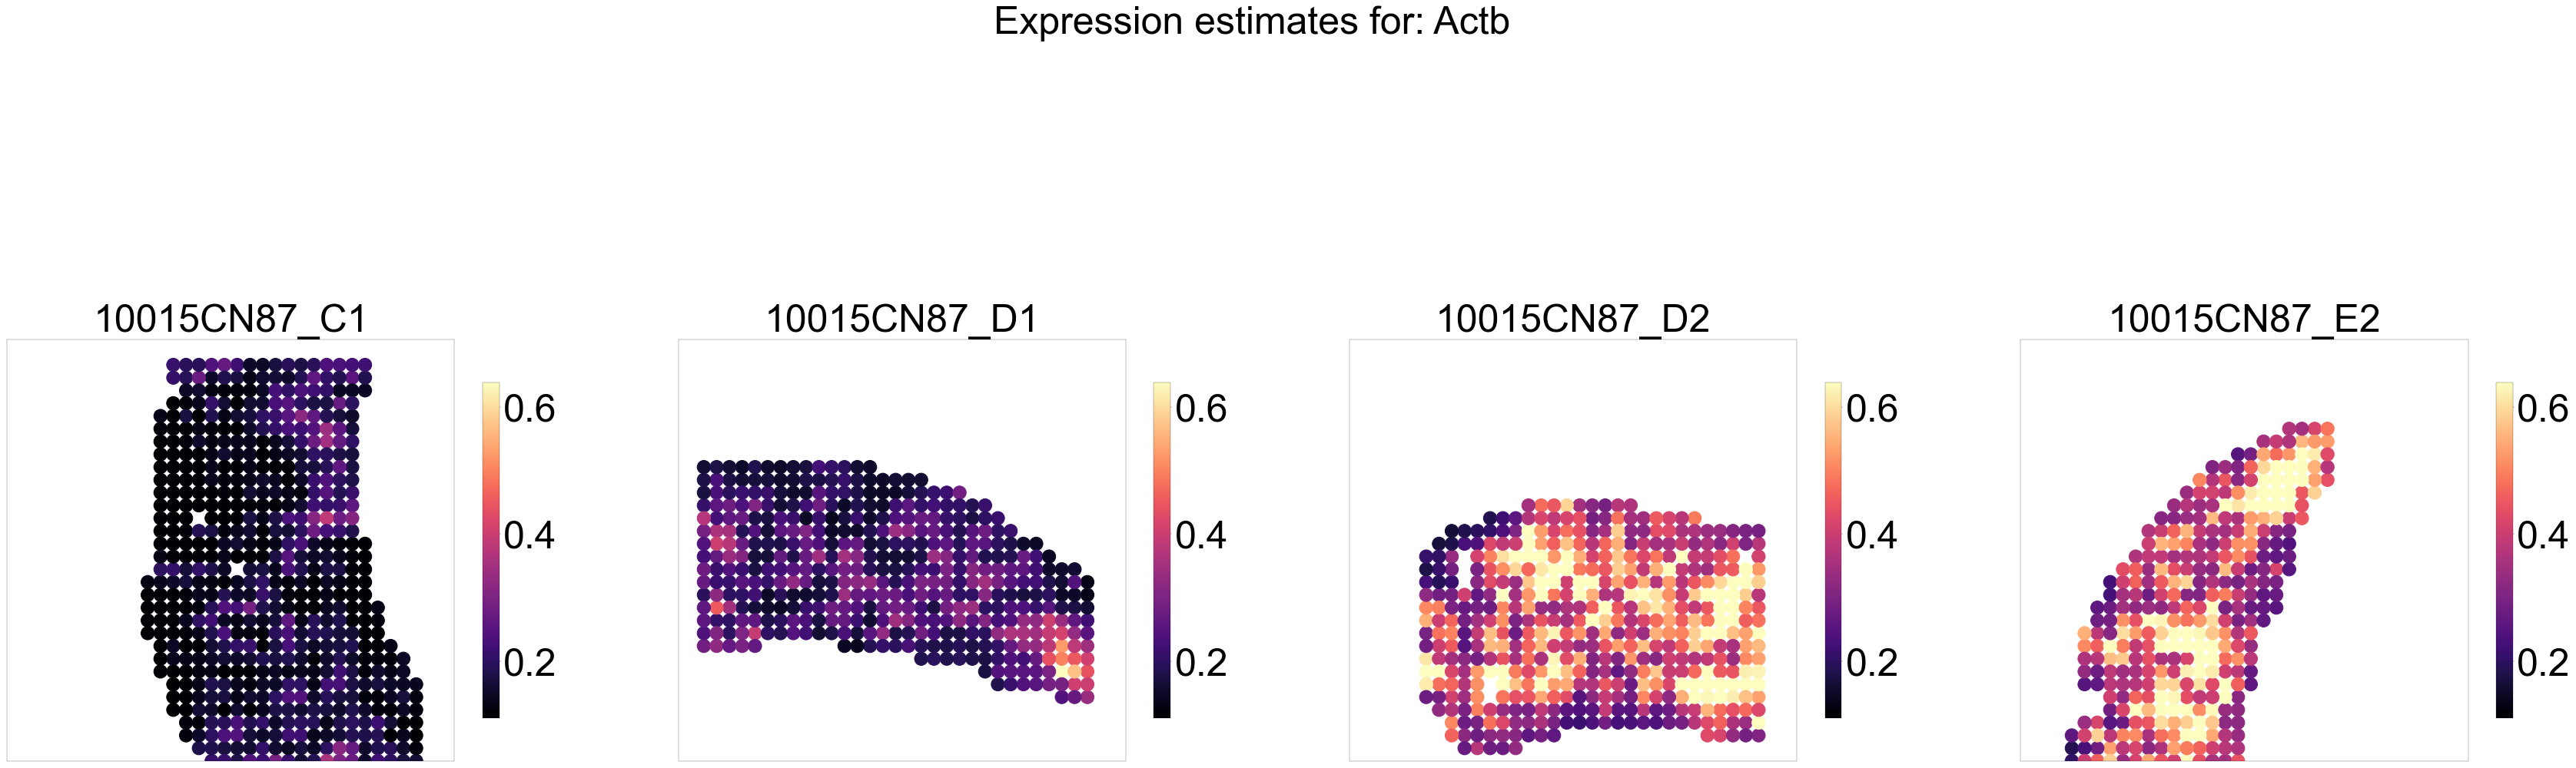

In [129]:
# initialize a figure
fig = matplotlib.pyplot.figure(figsize=(60, 60))

num_cols = 4

axes = []
for j in range(0, num_cols):
    ax = plt.subplot2grid((int(len(np.unique(count_files))), num_cols), (0, j))
    axes.append(ax) 

# use the same color scale across the arrays
if plot_counts == "raw":
    vmin,vmax = numpy.percentile(lambda_posterior_means[:,gene].layers['counts'],5),numpy.percentile(lambda_posterior_means[:,gene].layers['counts'],95)
else:
     vmin,vmax = numpy.percentile(lambda_posterior_means[:,gene].X,5),numpy.percentile(lambda_posterior_means[:,gene].X,95)
fig.suptitle("Expression estimates for: " + gene, fontsize=50)

# loop over the count files
for n, count_file in enumerate(np.unique(count_files)):
    
    ax = axes[n]
    
    if plot_counts == "raw":

        a_tmp = lambda_posterior_means[lambda_posterior_means.obs['image'] == count_file,gene]

        colors = list(a_tmp.layers['counts'])
    else: 
        a_tmp = lambda_posterior_means[lambda_posterior_means.obs['image'] == count_file,gene]

        colors = list(a_tmp.X)
    
    x_coordinates = ((a_tmp.obs.x))
    y_coordinates = ((a_tmp.obs.y))
    
    s=300
    cbmap = ax.scatter(x_coordinates,y_coordinates,
                       s=s,c=colors,
                       cmap='magma',vmin=vmin,vmax=vmax,marker='o')
    
    ax.set_aspect('equal')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlim(0,35)
    ax.set_ylim(33,0)
    
    # put some information on the array in the title
    ax.set_title(count_file, fontsize=50)
    
    cbar = matplotlib.pyplot.colorbar(cbmap,ax=ax,shrink=0.6)
    cbar.ax.tick_params(labelsize=50) 
        
fig.subplots_adjust(top=0.90)